In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import mylib as lib

data = lib.readcsv('data\ind30_m_vw_rets.csv')
#data.head()
data.columns = data.columns.str.strip()
#data.columns

In [4]:
history_return = lib.annualized_return(data["1996":"2000"])
cov = data["1996":"2000"].cov()

In [5]:
assets = ["Food", "Steel"]
riskfree_rate = 0.1
lib.max_sharpe_ratio(riskfree_rate, history_return[assets], cov.loc[assets,assets])

Optimizer:
     fun: -0.37519573862893774
     jac: array([-2.26674968, -2.26708003])
 message: 'Optimization terminated successfully.'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([0.75040363, 0.24959637])


array([0.75040363, 0.24959637])

Optimizer:
     fun: -3.603246881667664
     jac: array([-0.75912508, -0.34570876, -1.51022789,  1.35938284, -1.55113399,
       -0.31958294,  1.12803543, -2.18716881,  0.25403717,  2.44883338,
        1.44014367,  0.63761958,  0.39439282, -2.18725607,  0.8481698 ,
       -1.87547827,  3.56463537, -2.1875914 , -1.97256085, -2.18711898,
       -0.15413198,  0.22279671, -2.18709439,  0.0483647 ,  0.70108831,
       -0.56729853, -2.18712598,  0.37950271, -1.33565512,  1.56928471])
 message: 'Optimization terminated successfully.'
    nfev: 452
     nit: 14
    njev: 14
  status: 0
 success: True
       x: array([1.65352539e-16, 0.00000000e+00, 8.39128951e-16, 0.00000000e+00,
       1.04691840e-15, 1.28542987e-15, 3.67051556e-15, 4.55961476e-01,
       0.00000000e+00, 6.34259010e-15, 2.52695198e-16, 0.00000000e+00,
       0.00000000e+00, 2.33810853e-01, 0.00000000e+00, 3.40347238e-16,
       2.46693578e-15, 1.38704163e-01, 3.65408053e-16, 8.94091688e-02,
       0.00000000e+00, 2.24253712e-

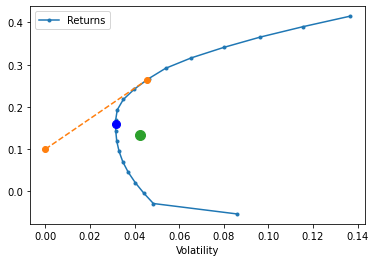

In [12]:
lib.portfolio_frontier_n_with_msr(riskfree_rate, 20, history_return, cov, show_ew= True, show_gmv=True)